In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from state_cleaner import *
import datetime
import csv
from scipy import stats as st
import itertools
import re 

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.chdir('../..')
os.chdir('CovidMobile')
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

In [3]:
def prez_data():
    prez = pd.read_csv("data/countypres_2000-2016.csv")
    prez = prez[prez['year']==2016]
    prez['vote_share'] = prez['candidatevotes'] / prez['totalvotes']
    prez['max'] = prez.groupby(['FIPS','year'])['candidatevotes'].transform(max)
    prez_win = prez[prez['max']==prez['candidatevotes']].copy()
    prez_win = pd.concat([prez_win.reset_index(),prez[prez['party']=='republican']['vote_share'].rename('vote_share_rep').reset_index()],axis=1)
    return prez_win

In [4]:
df = pd.read_csv('data/compiled_w_sg_2020-05-18.csv')
df.shape

(223921, 126)

In [5]:
df[df['state_abb_x']=='TX'].groupby(['FIPS'])['date'].count().sort_values().to_csv('chk.csv')

In [6]:
['soe', 'sah', 'state_ease', 'state_sah',
'state_mandate', 'state_non_ess', 'state_lgb', 'state_sc',
'state_bar_res', 'state_election', 'state_emergency',
'state_compliance', 'state_prepare']

['soe',
 'sah',
 'state_ease',
 'state_sah',
 'state_mandate',
 'state_non_ess',
 'state_lgb',
 'state_sc',
 'state_bar_res',
 'state_election',
 'state_emergency',
 'state_compliance',
 'state_prepare']

In [7]:
df.columns.values

array(['Unnamed: 0', 'country_region_code', 'country_region', 'state_x',
       'county_x', 'date', 'retail', 'food_drugs', 'park', 'transit',
       'work', 'homes', 'source', 'state_abb_x', 'FIPS', 'geo',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'Births_2018',
       'Deaths_2018', 'NATURAL_INC_2018', 'INTERNATIONAL_MIG_2018',
       'DOMESTIC_MIG_2018', 'NET_MIG_2018', 'RESIDUAL_2018',
       'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', '

In [8]:
dct = df[['state_abb_x','FIPS']].drop_duplicates().dropna()
dct.columns = ['neighbors_state','neighbors']


In [9]:
neighbors = df[['state_abb_x','FIPS']+list(df.filter(like='neighbors').columns.values)].drop_duplicates().dropna(subset=['state_abb_x','FIPS'])
neighbors_brs = list(neighbors.filter(like='neighbors').columns.values)

In [10]:
for x in range(1,16,1):
    dct.columns = ['neighbors_state{}'.format(x),'neighbors{}'.format(x)]
    neighbors = neighbors.merge(dct,on=['neighbors{}'.format(x)],how='left')

In [11]:
neighbors['border_states'] = neighbors.filter(like='neighbors_state').T.agg([pd.unique]).T
neighbors['count_border_states'] = neighbors['border_states'].apply(len)-2

In [12]:
neighbors[neighbors['count_border_states']==3]

,state_abb_x,FIPS,neighbors1,neighbors2,neighbors3,neighbors4,neighbors5,neighbors6,neighbors7,neighbors8,...,neighbors_state8,neighbors_state9,neighbors_state10,neighbors_state11,neighbors_state12,neighbors_state13,neighbors_state14,neighbors_state15,border_states,count_border_states
82,AZ,4001.0,4001.0,4009.0,4011.0,4017.0,8083.0,35003.0,35006.0,35031.0,...,NM,NM,UT,NaN,NaN,NaN,NaN,NaN,"[AZ, CO, nan, NM, UT]",3
90,AZ,4015.0,4005.0,4012.0,4015.0,4025.0,6071.0,32003.0,32017.0,49025.0,...,UT,UT,NaN,NaN,NaN,NaN,NaN,NaN,"[AZ, CA, NV, nan, UT]",3
261,CO,8083.0,4001.0,8033.0,8067.0,8083.0,8111.0,35045.0,49037.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[AZ, nan, CO, NM, UT]",3
292,DE,10003.0,10001.0,10003.0,24015.0,24029.0,34015.0,34033.0,42029.0,42045.0,...,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[DE, MD, NJ, PA, nan]",3
1128,MD,24043.0,24001.0,24021.0,24043.0,42055.0,42057.0,51107.0,54003.0,54037.0,...,WV,WV,NaN,NaN,NaN,NaN,NaN,NaN,"[MD, PA, VA, WV, nan]",3
1133,MA,25003.0,9005.0,25003.0,25011.0,25013.0,25015.0,36021.0,36027.0,36083.0,...,NY,VT,NaN,NaN,NaN,NaN,NaN,NaN,"[CT, MA, NY, VT, nan]",3
1145,MA,25027.0,9013.0,9015.0,25011.0,25013.0,25015.0,25017.0,25021.0,25027.0,...,MA,NH,NH,RI,NaN,NaN,NaN,NaN,"[CT, MA, NH, RI, nan]",3
1663,NM,35045.0,4001.0,8007.0,8067.0,8083.0,35031.0,35039.0,35043.0,35045.0,...,NM,UT,NaN,NaN,NaN,NaN,NaN,NaN,"[AZ, CO, NM, UT, nan]",3
2536,UT,49037.0,4001.0,4005.0,4017.0,8033.0,8077.0,8083.0,8085.0,8113.0,...,CO,NM,UT,UT,UT,UT,UT,NaN,"[AZ, nan, CO, NM, UT]",3


In [13]:
def squeeze_nan(x):
    original_columns = x.index.tolist()

    squeezed = x.dropna()
    squeezed.index = [original_columns[n] for n in range(squeezed.count())]

    return squeezed.reindex(original_columns, fill_value=np.nan)

In [14]:
tst = pd.DataFrame(neighbors['border_states'].to_list())
tst = tst.apply(squeeze_nan,axis=1)
tst = tst.dropna(how='all',axis=1)
tst = tst.drop(0,axis=1)
state_brs = ['border_state1','border_state2','border_state3']
tst.columns = state_brs
neighbors = pd.concat([neighbors,tst],axis=1)

In [15]:
df_all = df.merge(neighbors[['state_abb_x','FIPS','count_border_states','border_state1','border_state2','border_state3']],on=['state_abb_x','FIPS'])

In [16]:
df_all[(df_all['count_border_states']>0)&(df_all['count_border_states'].notnull())]['state_x'].value_counts()

Georgia           3362
North Carolina    3305
Kentucky          3281
Tennessee         3216
Virginia          3210
Missouri          3148
Indiana           2873
Texas             2805
Illinois          2798
Iowa              2569
Mississippi       2430
Pennsylvania      2407
Wisconsin         2405
Ohio              2228
New York          2158
Arkansas          2152
Alabama           2111
Minnesota         2099
West Virginia     2087
Louisiana         1754
Michigan          1731
Oklahoma          1690
Idaho             1660
South Carolina    1618
Maryland          1577
Kansas            1509
Oregon            1354
South Dakota      1348
New Jersey        1328
Nebraska          1284
Colorado          1231
New Mexico        1212
Florida           1162
Wyoming            988
California         972
Montana            952
Washington         905
Utah               876
Nevada             767
Vermont            761
Connecticut        664
New Hampshire      664
Massachusetts      664
Arizona    

In [17]:
prez = prez_data()
df_all = df_all.merge(prez, on =['FIPS'],how='left')

In [18]:
orders = ['soe', 'sah']
for x in orders:
    df_all['post_{}'.format(x)] = np.where(df_all[x]<=df_all['date'],1,0)
    
orders = ['state_sah',
'state_mandate', 'state_non_ess', 'state_lgb', 'state_sc',
'state_bar_res', 'state_election', 'state_emergency',
'state_compliance', 'state_prepare']

for x in orders:
    df_all['post_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'0')]<=df_all['date'],1,0)
    df_all['post_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'1')]<=df_all['date'],0,df_all['post_{}'.format(x)])
    df_all['eased_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'1')]<=df_all['date'],1,0)
    df_all['all_p_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'0')]<=df_all['date'],1,0)

In [20]:
county = pd.concat([df_all[['FIPS','date']],df_all.filter(like='post_'),df_all.filter(like='eased_')],axis=1)
county.drop_duplicates(inplace=True)
county.columns.values

array(['FIPS', 'date', 'post_soe', 'post_sah', 'post_state_sah',
       'post_state_mandate', 'post_state_non_ess', 'post_state_lgb',
       'post_state_sc', 'post_state_bar_res', 'post_state_election',
       'post_state_emergency', 'post_state_compliance',
       'post_state_prepare', 'eased_state_sah', 'eased_state_mandate',
       'eased_state_non_ess', 'eased_state_lgb', 'eased_state_sc',
       'eased_state_bar_res', 'eased_state_election',
       'eased_state_emergency', 'eased_state_compliance',
       'eased_state_prepare'], dtype=object)

In [21]:
states = pd.concat([df_all[['state_abb_x','date']],df_all.filter(like='post_'),df_all.filter(like='eased_')],axis=1)
states.drop_duplicates(inplace=True)
states.columns.values

array(['state_abb_x', 'date', 'post_soe', 'post_sah', 'post_state_sah',
       'post_state_mandate', 'post_state_non_ess', 'post_state_lgb',
       'post_state_sc', 'post_state_bar_res', 'post_state_election',
       'post_state_emergency', 'post_state_compliance',
       'post_state_prepare', 'eased_state_sah', 'eased_state_mandate',
       'eased_state_non_ess', 'eased_state_lgb', 'eased_state_sc',
       'eased_state_bar_res', 'eased_state_election',
       'eased_state_emergency', 'eased_state_compliance',
       'eased_state_prepare'], dtype=object)

In [22]:
for i,x in enumerate(state_brs):
    i = i +1
    states.columns = [x, 'date', 'post_soe_s{}'.format(i), 'post_sah_s{}'.format(i),
       'post_state_sah_s{}'.format(i), 'post_state_mandate_s{}'.format(i), 'post_state_non_ess_s{}'.format(i),
       'post_state_lgb_s{}'.format(i), 'post_state_sc_s{}'.format(i), 'post_state_bar_res_s{}'.format(i),
       'post_state_election_s{}'.format(i), 'post_state_emergency_s{}'.format(i),
       'post_state_compliance_s{}'.format(i), 'post_state_prepare_s{}'.format(i),'eased_state_sah_s{}'.format(i),
        'eased_state_mandate_s{}'.format(i),'eased_state_non_ess_s{}'.format(i),
        'eased_state_lgb_s{}'.format(i), 'eased_state_sc_s{}'.format(i),
       'eased_state_bar_res_s{}'.format(i), 'eased_state_election_s{}'.format(i),
       'eased_state_emergency_s{}'.format(i), 'eased_state_compliance_s{}'.format(i),
       'eased_state_prepare_s{}'.format(i)]
    df_all = df_all.merge(states, on=[x,'date'],how='left')

In [23]:
df_all.shape

(223921, 243)

In [24]:
for i,x in enumerate(neighbors_brs):
    i = i +1
    county.columns = [x, 'date', 'post_soe_n{}'.format(i), 'post_sah_n{}'.format(i),
       'post_state_sah_n{}'.format(i), 'post_state_mandate_n{}'.format(i), 'post_state_non_ess_n{}'.format(i),
       'post_state_lgb_n{}'.format(i), 'post_state_sc_n{}'.format(i), 'post_state_bar_res_n{}'.format(i),
       'post_state_election_n{}'.format(i), 'post_state_emergency_n{}'.format(i),
       'post_state_compliance_n{}'.format(i), 'post_state_prepare_n{}'.format(i),'eased_state_sah_n{}'.format(i),
        'eased_state_mandate_n{}'.format(i),'eased_state_non_ess_n{}'.format(i),
        'eased_state_lgb_n{}'.format(i), 'eased_state_sc_n{}'.format(i),
       'eased_state_bar_res_n{}'.format(i), 'eased_state_election_n{}'.format(i),
       'eased_state_emergency_n{}'.format(i), 'eased_state_compliance_n{}'.format(i),
       'eased_state_prepare_n{}'.format(i)]
    df_all = df_all.merge(county, on=[x,'date'],how='left')

In [25]:
df_all.shape

(223921, 573)

In [26]:
df_all[['post_state_sah', 'eased_state_sah', 'post_state_mandate',
   'eased_state_mandate', 'post_state_non_ess', 'eased_state_non_ess',
   'post_state_lgb', 'eased_state_lgb', 'post_state_sc',
   'eased_state_sc', 'post_state_bar_res', 'eased_state_bar_res',
   'post_state_election', 'eased_state_election',
   'post_state_emergency', 'eased_state_emergency',
   'post_state_compliance', 'eased_state_compliance',
   'post_state_prepare', 'eased_state_prepare']].describe()

,post_state_sah,eased_state_sah,post_state_mandate,eased_state_mandate,post_state_non_ess,eased_state_non_ess,post_state_lgb,eased_state_lgb,post_state_sc,eased_state_sc,post_state_bar_res,eased_state_bar_res,post_state_election,eased_state_election,post_state_emergency,eased_state_emergency,post_state_compliance,eased_state_compliance,post_state_prepare,eased_state_prepare
count,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.0,223921.000000,223921.0,223921.000000,223921.0,223921.000000,223921.0
mean,0.396421,0.025839,0.118591,0.002546,0.331353,0.064121,0.542370,0.010133,0.587707,0.000147,0.561368,0.024366,0.192791,0.0,0.692092,0.0,0.014402,0.0,0.012951,0.0
std,0.489155,0.158657,0.323307,0.050389,0.470701,0.244969,0.498203,0.100152,0.492248,0.012139,0.496221,0.154182,0.394491,0.0,0.461629,0.0,0.119143,0.0,0.113063,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


In [27]:
cutoff = pd.Timestamp(df_all[df_all['state_sah_0']!='2020-05-15']['state_sah_0'].max())
df_all['date'] = pd.to_datetime(df_all['date'],errors='coerce')

In [28]:
cutoff

Timestamp('2020-04-06 00:00:00')

In [29]:
for x in ['eased_state_sah_n','eased_state_non_ess_n','eased_state_lgb_n','eased_state_bar_res_n']:
    df_all['{}eighborall'.format(x)]=np.where(df_all.filter(like=x).sum(axis=1)>0,1,0) 
for x in ['post_state_sah_n','post_state_bar_res_n','post_state_non_ess_n']:
    sah_cols = list(df_all.filter(like='post_state_sah_n').columns.values)
    df_all['{}eighborall'.format(x)] = 1
    df_all['{}eighborall'.format(x)]=np.where(((df_all[sah_cols] == 1.0).any(axis=1)),1,0) 
    df_all['{}eighborall'.format(x)]=np.where(((df_all[sah_cols] == 0.0).any(axis=1))&(df_all['date']>cutoff),0,df_all['{}eighborall'.format(x)])

In [30]:
df_all[df_all['FIPS']==4001][['date','post_state_sah_neighborall','post_state_sah_n1','post_state_sah_n2','post_state_sah_n3']].to_csv('chk.csv')

In [31]:
df_all[['post_state_sah', 'post_state_mandate','post_state_non_ess','post_state_lgb','post_state_sc','post_state_bar_res', 
'post_state_emergency']].corr()



,post_state_sah,post_state_mandate,post_state_non_ess,post_state_lgb,post_state_sc,post_state_bar_res,post_state_emergency
post_state_sah,1.000000,0.204845,0.669725,0.666615,0.519857,0.623274,0.499774
post_state_mandate,0.204845,1.000000,0.298826,0.244275,0.307227,0.217067,0.192506
post_state_non_ess,0.669725,0.298826,1.000000,0.615971,0.573118,0.571825,0.431069
post_state_lgb,0.666615,0.244275,0.615971,1.000000,0.704303,0.779484,0.696991
post_state_sc,0.519857,0.307227,0.573118,0.704303,1.000000,0.754851,0.747221
post_state_bar_res,0.623274,0.217067,0.571825,0.779484,0.754851,1.000000,0.709149
post_state_emergency,0.499774,0.192506,0.431069,0.696991,0.747221,0.709149,1.000000


# Models - data transformation

In [32]:
import statsmodels.formula.api as smf
import statsmodels as sm
from statsmodels.iolib.summary2 import summary_col

In [33]:
usda = pd.read_csv('./data/clean_usda2.csv')

#Select certain variables to add into model:
usda_vars = ['FIPS','PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15','GROC14','SUPERC14','CONVS14','SPECS14',
            'PCT_SNAP16','FOODINSEC_13_15']
usda = usda[usda_vars]
#combine num grocery stores, supserstores, convenience stores and specialty food stores into totalstores
usda['total stores'] = usda['GROC14']+ usda['SUPERC14']+ usda['CONVS14']+ usda['SPECS14']

#rename columns:
newcols = ['FIPS','perc_pop_low_access15', 'perc_low_access_low_income15', 'grocery14', 'superstores14', 
           'convenience14', 'specialized14', 'perc_SNAP16', 'perc_food_insecure1315','total_stores']
d = {}
for i in range(len(newcols)):
    d[list(usda.columns)[i]] = newcols[i]
    
usda.rename(columns = d, inplace = True)

usda.head()

,FIPS,perc_pop_low_access15,perc_low_access_low_income15,grocery14,superstores14,convenience14,specialized14,perc_SNAP16,perc_food_insecure1315,total_stores
0,1001,32.062255,11.991125,4.0,1.0,30.0,2.0,16.976436,17.6,37.0
1,1003,16.767489,5.424427,29.0,6.0,118.0,26.0,16.976436,17.6,179.0
2,1005,22.105560,10.739667,5.0,1.0,19.0,2.0,16.976436,17.6,27.0
3,1007,4.230324,2.601627,5.0,1.0,15.0,1.0,16.976436,17.6,22.0
4,1009,6.497380,2.880150,6.0,1.0,27.0,0.0,16.976436,17.6,34.0


In [26]:
df_all[df_all['state_abb_x']=='TX'].groupby(['FIPS'])['date'].count().to_csv('chk.csv')

In [27]:
df_all.columns.values

array(['Unnamed: 0', 'country_region_code', 'country_region', 'state_x',
       'county_x', 'date', 'retail', 'food_drugs', 'park', 'transit',
       'work', 'homes', 'source', 'state_abb_x', 'FIPS', 'geo',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'Births_2018',
       'Deaths_2018', 'NATURAL_INC_2018', 'INTERNATIONAL_MIG_2018',
       'DOMESTIC_MIG_2018', 'NET_MIG_2018', 'RESIDUAL_2018',
       'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', '

In [35]:
df_all[df_all['eased_state_sah']==1].drop_duplicates(subset=['state_x'])

,Unnamed: 0,country_region_code,country_region,state_x,county_x,date,retail,food_drugs,park,transit,...,eased_state_emergency_n15,eased_state_compliance_n15,eased_state_prepare_n15,eased_state_sah_neighborall,eased_state_non_ess_neighborall,eased_state_lgb_neighborall,eased_state_bar_res_neighborall,post_state_sah_neighborall,post_state_bar_res_neighborall,post_state_non_ess_neighborall
75,75,US,United States,Alabama,AL,2020-04-30,-18.0,3.0,15.0,-18.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
5578,5578,US,United States,Alaska,AK,2020-04-24,-28.0,-8.0,33.0,-44.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
18048,18048,US,United States,Colorado,CO,2020-04-27,-31.0,-13.0,51.0,-49.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
23117,23117,US,United States,Florida,FL,2020-05-04,-32.0,-15.0,-30.0,-50.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
28684,28684,US,United States,Georgia,GA,2020-04-24,-31.0,-10.0,22.0,-48.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
40920,40920,US,United States,Idaho,ID,2020-04-23,-29.0,-6.0,30.0,-25.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51525,51525,US,United States,Indiana,IN,2020-05-01,-23.0,-1.0,106.0,-16.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
66499,66499,US,United States,Kansas,KS,2020-04-30,-24.0,-4.0,136.0,-13.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
102441,102441,US,United States,Mississippi,MS,2020-04-27,-12.0,-1.0,6.0,-20.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [36]:
df_all[df_all['post_state_bar_res']==1].groupby(['state_x'])['date'].max().sort_values()

state_x
Alaska                 2020-04-23
Georgia                2020-04-23
Iowa                   2020-04-26
Texas                  2020-04-30
Missouri               2020-05-03
Nebraska               2020-05-03
Florida                2020-05-03
Montana                2020-05-03
Nevada                 2020-05-07
New Hampshire          2020-05-07
New Jersey             2020-05-07
New Mexico             2020-05-07
New York               2020-05-07
North Carolina         2020-05-07
Ohio                   2020-05-07
Alabama                2020-05-07
Pennsylvania           2020-05-07
South Carolina         2020-05-07
Tennessee              2020-05-07
Utah                   2020-05-07
Vermont                2020-05-07
Virginia               2020-05-07
Washington             2020-05-07
West Virginia          2020-05-07
Oregon                 2020-05-07
Rhode Island           2020-05-07
Minnesota              2020-05-07
Wisconsin              2020-05-07
Arizona                2020-05-07
Arkans

In [37]:
df_all[['retail','food_drugs','work','homes','pct_social_distancing']].describe()

,retail,food_drugs,work,homes,pct_social_distancing
count,169406.000000,162673.000000,214071.000000,102087.000000,197670.000000
mean,-14.158743,0.358062,-21.945761,9.207206,0.336046
std,24.179539,15.676325,19.206692,8.603684,0.077176
min,-100.000000,-81.000000,-81.000000,-11.000000,0.040541
25%,-34.000000,-9.000000,-37.000000,0.000000,0.276447
50%,-13.000000,1.000000,-26.000000,10.000000,0.330298
75%,6.000000,9.000000,0.000000,16.000000,0.390350
max,226.000000,174.000000,43.000000,38.000000,1.000000


In [38]:
#descriptives of missing
vrs = ['retail','food_drugs','work','homes','pct_social_distancing']
for x in vrs:
    df_all['miss_{}'.format(x)] = np.where(df_all[x].isnull(),1,0)
    print('\nMissing Comparison for -{}\n{}'.format(x,df_all.drop_duplicates(['FIPS','miss_{}'.format(x)]).groupby(['miss_{}'.format(x)])['POP_ESTIMATE_2018'].describe()))


Missing Comparison for -retail
              count           mean           std     min       25%      50%  \
miss_retail                                                                   
0            2628.0  247138.028539  1.379264e+06  2194.0  17829.50  36431.5   
1            1598.0   18706.746558  1.102550e+04   148.0  10061.75  16349.0   

                  75%         max  
miss_retail                        
0            97968.25  39461588.0  
1            25019.75     71731.0  

Missing Comparison for -food_drugs
                  count           mean           std    min      25%      50%  \
miss_food_drugs                                                                 
0                2537.0  255580.789121  1.403058e+06  148.0  19274.0  38264.0   
1                1751.0   24158.568247  4.626439e+04  731.0  10644.0  17713.0   

                      75%         max  
miss_food_drugs                        
0                103044.0  39461588.0  
1                 28103.0 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E382513048>,
      dtype=object)

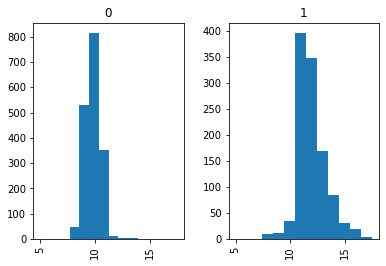

In [39]:
#descriptives of missing
df_all['obs'] = 1
df_all['nomiss_3'] = np.where(df_all[['retail','food_drugs','work']].isnull().any(axis=1),0,1)
df_all['consecutive_days_nomiss_3'] = df_all.groupby(['FIPS','nomiss_3'])['obs'].transform(sum)
df_all['max_days'] = np.where(df_all['consecutive_days_nomiss_3'] == df_all['consecutive_days_nomiss_3'].max(),1,0)
df_all['ln_pop'] = np.log(df_all['POP_ESTIMATE_2018'])
df_all.drop_duplicates(['FIPS','max_days']).hist(column='ln_pop',by='max_days',sharex=True)

In [40]:
df_all[df_all['max_days']==1][['eased_state_sah_neighborall','eased_state_non_ess_neighborall','eased_state_lgb_neighborall','eased_state_bar_res_neighborall']].describe()

,eased_state_sah_neighborall,eased_state_non_ess_neighborall,eased_state_lgb_neighborall,eased_state_bar_res_neighborall
count,91881.000000,91881.000000,91881.000000,91881.000000
mean,0.025468,0.064279,0.009458,0.023204
std,0.157542,0.245250,0.096791,0.150551
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [41]:
for x in ['retail','food_drugs','work','homes','pct_social_distancing']:
    print('Desc - {}\n{}'.format(x,df_all.dropna(subset=[x])[['eased_state_sah_neighborall','eased_state_non_ess_neighborall','eased_state_lgb_neighborall','eased_state_bar_res_neighborall']].describe()))

Desc - retail
       eased_state_sah_neighborall  eased_state_non_ess_neighborall  \
count                169406.000000                    169406.000000   
mean                      0.019409                         0.046403   
std                       0.137958                         0.210358   
min                       0.000000                         0.000000   
25%                       0.000000                         0.000000   
50%                       0.000000                         0.000000   
75%                       0.000000                         0.000000   
max                       1.000000                         1.000000   

       eased_state_lgb_neighborall  eased_state_bar_res_neighborall  
count                169406.000000                    169406.000000  
mean                      0.008223                         0.016062  
std                       0.090307                         0.125714  
min                       0.000000                         0.00000

In [33]:
df_all['chk'] = 1- df_all['pct_leaving_home']

In [34]:
df_all['date'] = pd.to_datetime(df_all['date'],errors='coerce')
state_dumms = pd.get_dummies(df_all.state_abb_x)
states = state_dumms.columns.values
day_dumms = pd.get_dummies(df_all['date'].dt.date)
print(len(day_dumms.columns))
day_dumms.columns = ['day' + str(i) for i in list(range(0,len(day_dumms.columns)))]
days = day_dumms.columns.values
df_fin = pd.concat([df_all,state_dumms,day_dumms],axis=1)
df_fin = df_fin
df_fin['pct_social_distancing'] = df_fin['pct_social_distancing']*100
df_fin['pct_leaving_home'] = df_fin['pct_leaving_home']*100
df_fin = df_fin[(df_fin['state_abb_x']!="AK")|df_fin['state_abb_x']!="HI"].copy() 
df_fin.rename(columns={'Percent of adults with less than a high school diploma, 2014-18':'pct_less_hs',
       'Percent of adults with a high school diploma only, 2014-18':'pct_only_hs',
       "Percent of adults completing some college or associate's degree, 2014-18":'pct_some_co',
       "Percent of adults with a bachelor's degree or higher, 2014-18":'pct_has_co'}, inplace=True)
df_fin = df_fin.merge(usda,on=['FIPS'],how='left')
extra_controls = ['ln_total_stores','perc_pop_low_access15','pct_less_hs','pct_only_hs','pct_some_co','PCTPOVALL_2018']
df_fin['ln_pop'] = df_fin['POP_ESTIMATE_2018'].apply(np.log)
df_fin['ln_income'] = df_fin['Median_Household_Income_2018'].apply(np.log)
df_fin['ln_employed'] = df_fin['Employed_2018'].apply(np.log)
df_fin['ln_unemployed'] = df_fin['Unemployed_2018'].apply(np.log)
df_fin['ln_total_stores'] = df_fin['total_stores'].apply(np.log)
df_fin['obs'] = 1
df_fin = df_fin.dropna(subset= ['party'])
print(df_fin.shape)
df_fin['nomiss_3'] = np.where(df_fin[['pct_social_distancing','pct_leaving_home','work']].isnull().any(axis=1),0,1)
df_fin['consecutive_days_nomiss_3'] = df_fin.groupby(['FIPS','nomiss_3'])['obs'].transform(sum)
df_fin['max_days'] = np.where(df_fin['consecutive_days_nomiss_3'] == df_fin['consecutive_days_nomiss_3'].max(),1,0)
df_fin.sort_values(by=['FIPS','date'],inplace=True)
df_fin['borders_state'] = np.where(df_fin['count_border_states']>0,1,0)

83


C:\Users\Noah\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(219059, 737)


In [45]:
df_fin[['post_state_sah', 'eased_state_sah', 'post_state_mandate',
   'eased_state_mandate', 'post_state_non_ess', 'eased_state_non_ess',
   'post_state_lgb', 'eased_state_lgb', 'post_state_sc',
   'eased_state_sc', 'post_state_bar_res', 'eased_state_bar_res',
   'post_state_election', 'eased_state_election',
   'post_state_emergency', 'eased_state_emergency',
   'post_state_compliance', 'eased_state_compliance',
   'post_state_prepare', 'eased_state_prepare']].describe()

,post_state_sah,eased_state_sah,post_state_mandate,eased_state_mandate,post_state_non_ess,eased_state_non_ess,post_state_lgb,eased_state_lgb,post_state_sc,eased_state_sc,post_state_bar_res,eased_state_bar_res,post_state_election,eased_state_election,post_state_emergency,eased_state_emergency,post_state_compliance,eased_state_compliance,post_state_prepare,eased_state_prepare
count,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.0,219059.000000,219059.0,219059.000000,219059.0,219059.000000,219059.0
mean,0.396272,0.025454,0.115704,0.002543,0.330591,0.063832,0.542954,0.009568,0.586741,0.000146,0.561570,0.024085,0.193971,0.0,0.692046,0.0,0.014462,0.0,0.012942,0.0
std,0.489123,0.157501,0.319870,0.050361,0.470427,0.244454,0.498153,0.097348,0.492420,0.012085,0.496196,0.153313,0.395407,0.0,0.461648,0.0,0.119385,0.0,0.113023,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


In [46]:
df_fin.columns.values

array(['Unnamed: 0', 'country_region_code', 'country_region', 'state_x',
       'county_x', 'date', 'retail', 'food_drugs', 'park', 'transit',
       'work', 'homes', 'source', 'state_abb_x', 'FIPS', 'geo',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'Births_2018',
       'Deaths_2018', 'NATURAL_INC_2018', 'INTERNATIONAL_MIG_2018',
       'DOMESTIC_MIG_2018', 'NET_MIG_2018', 'RESIDUAL_2018',
       'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', '

In [56]:
# set one
one = {'name':'one',
    'lhs':['pct_social_distancing','pct_leaving_home','work','retail'],
'rhs':['C(count_border_states)'],
'controls':['post_state_sah', 'eased_state_sah','post_state_lgb',
            'post_state_non_ess', 'eased_state_non_ess','post_state_bar_res', 'eased_state_bar_res',
            'eased_state_sah_neighborall','eased_state_non_ess_neighborall',
            'eased_state_bar_res_neighborall','post_state_emergency',
            'vote_share_rep','ln_pop','ln_income',
            'ln_employed','ln_unemployed'] + list(days)[1:] + list(states)[1:],
'sample':['obs','max_days']}

In [57]:
# set one
two = {'name':'two',
    'lhs':['pct_social_distancing','pct_leaving_home','work','retail'],
'rhs':['eased_state_sah_neighborall','eased_state_non_ess_neighborall','eased_state_bar_res_neighborall'],
'controls':['C(count_border_states)','post_state_sah', 'eased_state_sah','post_state_lgb',
            'post_state_non_ess', 'eased_state_non_ess','post_state_bar_res', 'eased_state_bar_res'
            ,'post_state_emergency',
            'vote_share_rep','ln_pop','ln_income',
            'ln_employed','ln_unemployed'] + list(days)[1:] + list(states)[1:],
'sample':['obs','max_days']}

In [73]:
runs_1 = [one, two]

In [ ]:
df_fin

In [72]:
df_fin[df_fin['post_state_sah_n1'].isnull()]['post_state_sah_neighborall'].sum()

0

In [74]:
df_fin['pct_social_distancing'].describe()

count    197587.000000
mean         33.603946
std           7.709063
min           4.054054
25%          27.646101
50%          33.029751
75%          39.033667
max          66.935484
Name: pct_social_distancing, dtype: float64

In [47]:
df_fin[['eased_state_sah_neighborall','eased_state_non_ess_neighborall','eased_state_lgb_neighborall','eased_state_bar_res_neighborall']].corr()

,eased_state_sah_neighborall,eased_state_non_ess_neighborall,eased_state_lgb_neighborall,eased_state_bar_res_neighborall
eased_state_sah_neighborall,1.000000,0.635265,0.637551,0.406302
eased_state_non_ess_neighborall,0.635265,1.000000,0.405013,0.449447
eased_state_lgb_neighborall,0.637551,0.405013,1.000000,0.028951
eased_state_bar_res_neighborall,0.406302,0.449447,0.028951,1.000000


In [50]:
# First Set
res = []
models = []
for r in runs_1:
    for x in r['rhs']:
        for y in r['lhs']:
            for s in r['sample']:
                vrs = [x] + r['controls'] + [y]
                vrs = [re.split(r'\*| \+ ',i.replace('C(','').replace(')','')) for i in vrs]
                vrs = list(itertools.chain.from_iterable(vrs))
                sam = df_fin[(df_fin[s]==1)&(df_fin[y].notnull())][vrs].copy()
                X = [x] + r['controls'] 
                strng = '{} ~ '.format(y) + ' + '.join([str(i) for i in X])
                print(sam[y].describe())
                mod = smf.ols(strng,data=sam)
                print(r['name'],s,y,x)
                fitted = mod.fit(cov_type='HC1', return_type='dataframe')
                res.extend([fitted])
                title = 'Sample={}\nLHS={}\nRHS={}'.format(s,y,x)
                models.extend([title])
                sam = None
results = summary_col(res,stars=True,float_format='%0.2f',
                  model_names=models,
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared),
                            'R2adj':lambda x: "{:.2f}".format(x.rsquared_adj),
                            'F-pval':lambda x: "{:.2f}".format(int(x.f_pvalue))})
pd.DataFrame(results.tables[0]).to_csv('models/neighbors_run.csv')

count    197587.000000
mean         33.603946
std           7.709063
min           4.054054
25%          27.646101
50%          33.029751
75%          39.033667
max          66.935484
Name: pct_social_distancing, dtype: float64
one obs pct_social_distancing C(count_border_states)
count    143092.000000
mean         34.423802
std           7.836448
min          13.125000
25%          28.133346
50%          33.975482
75%          40.078641
max          66.907744
Name: pct_social_distancing, dtype: float64
one max_days pct_social_distancing C(count_border_states)
count    197587.000000
mean         70.328794
std           8.055225
min          36.602153
25%          64.679747
50%          70.693780
75%          76.611131
max          96.666667
Name: pct_leaving_home, dtype: float64
one obs pct_leaving_home C(count_border_states)
count    143092.000000
mean         69.449206
std           8.260443
min          36.602153
25%          63.540117
50%          69.626168
75%          76.076120
m

C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 151, but rank is 144
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 151, but rank is 144
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 151, but rank is 144
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 151, but rank is 144
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarni

In [58]:
df_fin.columns.values

array(['Unnamed: 0', 'country_region_code', 'country_region', 'state_x',
       'county_x', 'date', 'retail', 'food_drugs', 'park', 'transit',
       'work', 'homes', 'source', 'state_abb_x', 'FIPS', 'geo',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'Births_2018',
       'Deaths_2018', 'NATURAL_INC_2018', 'INTERNATIONAL_MIG_2018',
       'DOMESTIC_MIG_2018', 'NET_MIG_2018', 'RESIDUAL_2018',
       'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', '

In [66]:
# set one
one = {'name':'one',
    'lhs':['pct_social_distancing','pct_leaving_home','work','retail'],
'rhs':[['post_state_sah_neighborall','post_state_sah'],['all_p_state_sah', ]],
'controls':['borders_state',
            'vote_share_rep','ln_pop','ln_income',
            'ln_employed','ln_unemployed'] + list(days)[1:] + list(states)[1:],
'sample':['obs','max_days']}

In [67]:
runs_1 = [one]

In [69]:
# First Set
res = []
models = []
for r in runs_1:
    for x in r['rhs']:
        for y in r['lhs']:
            for s in r['sample']:
                vrs = [x] + r['controls'] + [y]
                vrs = [re.split(r'\*| \+ ',i.replace('C(','').replace(')','')) for i in vrs]
                vrs = list(itertools.chain.from_iterable(vrs))
                sam = df_fin[(df_fin[s]==1)&(df_fin[y].notnull())][vrs].copy()
                X = [x] + r['controls'] 
                strng = '{} ~ '.format(y) + ' + '.join([str(i) for i in X])
                print(sam[y].describe())
                mod = smf.ols(strng,data=sam)
                print(r['name'],s,y,x)
                fitted = mod.fit(cov_type='HC1', return_type='dataframe')
                res.extend([fitted])
                title = 'Sample={}\nLHS={}\nRHS={}'.format(s,y,x)
                models.extend([title])
                sam = None
results = summary_col(res,stars=True,float_format='%0.2f',
                  model_names=models,
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared),
                            'R2adj':lambda x: "{:.2f}".format(x.rsquared_adj),
                            'F-pval':lambda x: "{:.2f}".format(int(x.f_pvalue))})
pd.DataFrame(results.tables[0]).to_csv('models/neighbors_run_v2.csv')

count    197587.000000
mean         33.603946
std           7.709063
min           4.054054
25%          27.646101
50%          33.029751
75%          39.033667
max          66.935484
Name: pct_social_distancing, dtype: float64
one obs pct_social_distancing post_state_sah_neighborall
count    143092.000000
mean         34.423802
std           7.836448
min          13.125000
25%          28.133346
50%          33.975482
75%          40.078641
max          66.907744
Name: pct_social_distancing, dtype: float64
one max_days pct_social_distancing post_state_sah_neighborall
count    197587.000000
mean         70.328794
std           8.055225
min          36.602153
25%          64.679747
50%          70.693780
75%          76.611131
max          96.666667
Name: pct_leaving_home, dtype: float64
one obs pct_leaving_home post_state_sah_neighborall
count    143092.000000
mean         69.449206
std           8.260443
min          36.602153
25%          63.540117
50%          69.626168
75%         

C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 140, but rank is 133
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 140, but rank is 133
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 140, but rank is 133
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 140, but rank is 133
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Noah\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarni

In [52]:
for y in r['lhs']:
    for s in r['sample']:
        t = df_fin[(df_fin[y].notnull())&(df_fin[s]==1)].copy()
        for x in ['eased_state_sah_neighborall','eased_state_non_ess_neighborall','eased_state_bar_res_neighborall']:
            print('Stats for {}'.format(x))
            print(t.shape[0],np.round(t[x].mean(),2),t[x].sum())

Stats for eased_state_sah_neighborall
197587 0.01 1024
Stats for eased_state_non_ess_neighborall
197587 0.03 5077
Stats for eased_state_bar_res_neighborall
197587 0.01 1458
Stats for eased_state_sah_neighborall
143092 0.01 732
Stats for eased_state_non_ess_neighborall
143092 0.03 3863
Stats for eased_state_bar_res_neighborall
143092 0.01 967
Stats for eased_state_sah_neighborall
197587 0.01 1024
Stats for eased_state_non_ess_neighborall
197587 0.03 5077
Stats for eased_state_bar_res_neighborall
197587 0.01 1458
Stats for eased_state_sah_neighborall
143092 0.01 732
Stats for eased_state_non_ess_neighborall
143092 0.03 3863
Stats for eased_state_bar_res_neighborall
143092 0.01 967
Stats for eased_state_sah_neighborall
209244 0.01 1332
Stats for eased_state_non_ess_neighborall
209244 0.03 5527
Stats for eased_state_bar_res_neighborall
209244 0.01 1635
Stats for eased_state_sah_neighborall
159771 0.01 980
Stats for eased_state_non_ess_neighborall
159771 0.03 4227
Stats for eased_state_bar_

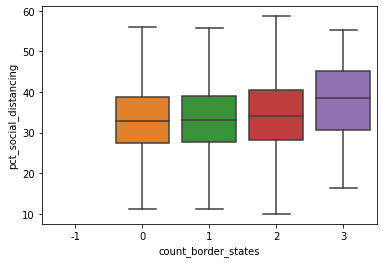

In [43]:
sns.boxplot(x='count_border_states',y='pct_social_distancing',data=df_fin,showfliers=False)

In [49]:
df_fin[df_fin['state_abb_x']=="AL"]['FIPS'].drop_duplicates()

83      1001.0
166     1003.0
249     1005.0
332     1007.0
415     1009.0
         ...  
5122    1125.0
5205    1127.0
5288    1129.0
5363    1131.0
5426    1133.0
Name: FIPS, Length: 67, dtype: float64

In [52]:
df_fin[(df_fin['state_abb_x']=="AL")&(df_fin['eased_state_bar_res_neighborall']==1)]['FIPS'].drop_duplicates()

245     1003.0
808     1017.0
891     1019.0
1290    1029.0
1691    1039.0
2092    1049.0
2268    1053.0
2592    1061.0
2828    1067.0
2911    1069.0
2994    1071.0
3401    1081.0
4623    1111.0
4706    1113.0
Name: FIPS, dtype: float64